In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\Yatesh\\Desktop\\Python Ca\\1_Practice\\1Other's\\world-happiness-report-2021.csv")

In [3]:
df.head()

,Country name,Regional indicator,Happiness,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## first we will take out only the columns required for our analysis 

In [4]:
df_columns=['Country name','Regional indicator','Happiness','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [5]:
df=df[df_columns].copy()

In [10]:
df.head()

,Country name,Regional indicator,Happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


# parameters explained
- Happiness: Happiness score or subjective well-being. This is the national average response to the question of life evaluations.
- Logged GDP per capita: The GDP-per-capita time series from 2019 to 2020 using countryspecific forecasts of real GDP growth in 2020.
- Social support: Social support refers to assistance or support provided by members of social networks to an individual.
- Healthy life expectancy: Healthy life expectancy is the average life in good health - that is to say without irreversible limitation of activity in daily life or incapacities - of a fictitious generation subject to the conditions of mortality and morbidity prevailing that year.
- Freedom to make life choices: Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” ... It is defined as the average of laughter and enjoyment for other waves where the happiness question was not asked
- Generosity: Generosity is the residual of regressing national average of response to the GWP question “Have you donated money to a charity in the past month?” on GDP per capita.
- Perceptions of corruption: The measure is the national average of the survey responses to two questions in the GWP: “Is corruption widespread throughout the government or not” and “Is corruption widespread within businesses or not?”

## first we will check if is there any null values in columns of the data set

In [13]:
df.isnull().sum()

Country name                    0
Regional indicator              0
Happiness                       0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

## Plot between happiness and GDP

In [25]:
df.columns

Index(['Country name', 'Regional indicator', 'Happiness',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

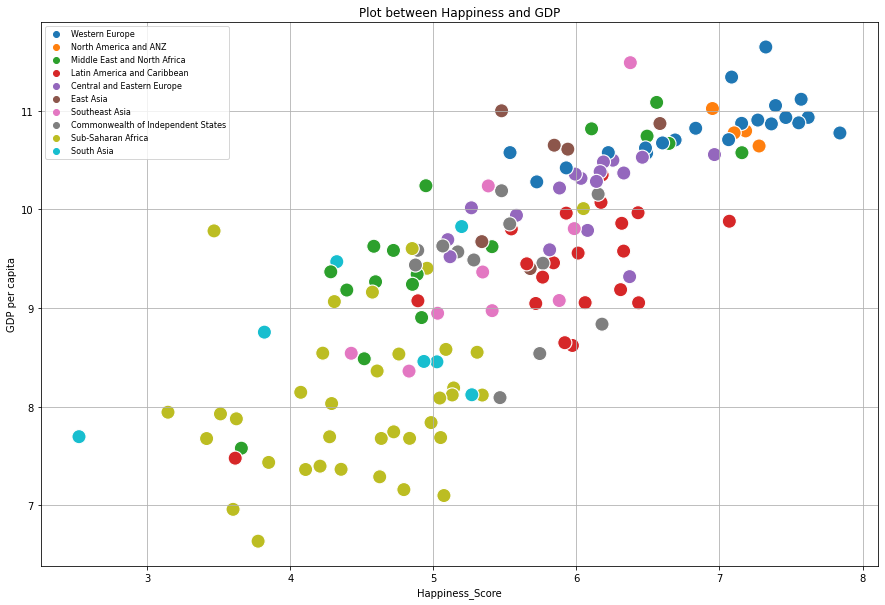

In [37]:
plt.figure(figsize=(15,10))
plt.title("Plot between Happiness and GDP")
sns.scatterplot(x=df["Happiness"],y=df["Logged GDP per capita"],hue=df["Regional indicator"],s=200)
plt.legend(loc='upper left',fontsize=8)
plt.xlabel('Happiness_Score')
plt.ylabel('GDP per capita')
plt.grid()
plt.show()

 - From the above graph, we can say that
    - Western Europe region has the higest happiness score as their GDP is also highest
    - Sub-saharan africa and south asia has the lowest happiness score along with their GDP which is also less.
    - North American counrties have good happiness score along with their GDP

# Relation between GDP per capita as per regional indicator

In [83]:
gdp_region=df.groupby('Regional indicator')['Logged GDP per capita'].sum().sort_values(ascending=False)

In [84]:
gdp_region

Regional indicator
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Latin America and Caribbean           187.400
Central and Eastern Europe            171.854
Middle East and North Africa          164.324
Commonwealth of Independent States    112.822
Southeast Asia                         84.793
East Asia                              62.206
South Asia                             60.778
North America and ANZ                  43.238
Name: Logged GDP per capita, dtype: float64

In [117]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.facecolor']='FFE5B4'

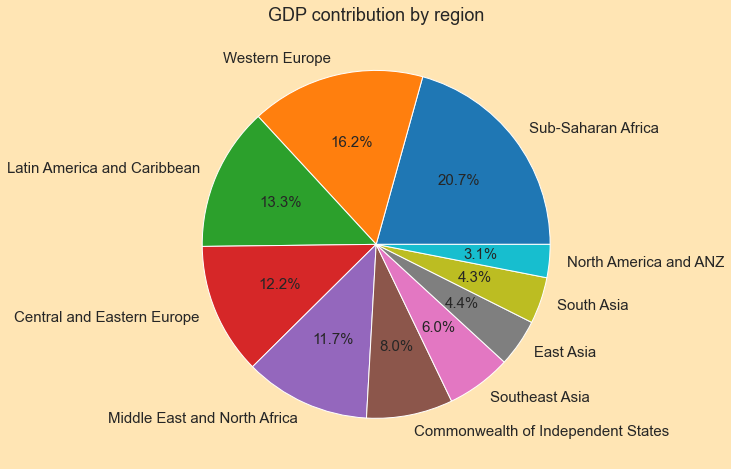

In [123]:
plt.title("GDP contribution by region",loc="center")
gdp_region.plot.pie(autopct="%1.1f%%")
plt.ylabel("")
plt.show()

 - From the above pie chart, we can see that sub saharan region contributes the most to GDP while north america and ANZ the least since they have only 4 countries

# Total countries in each region

In [133]:
Total_countries=df.groupby("Regional indicator")["Country name"].count().sort_values(ascending=False)

In [134]:
Total_countries

Regional indicator
Sub-Saharan Africa                    36
Western Europe                        21
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Country name, dtype: int64

## plot the above values using count plot

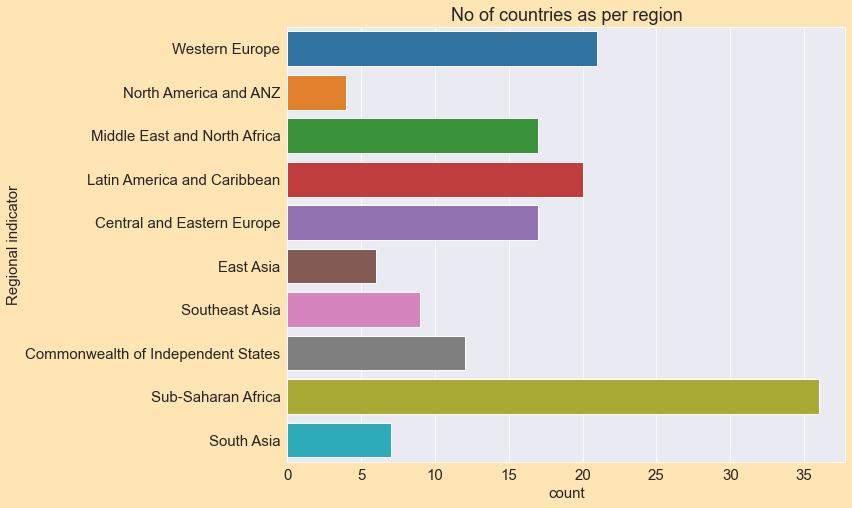

In [137]:
sns.countplot(y="Regional indicator",data=df)
plt.title("No of countries as per region")
plt.show()

# Correlation matrix

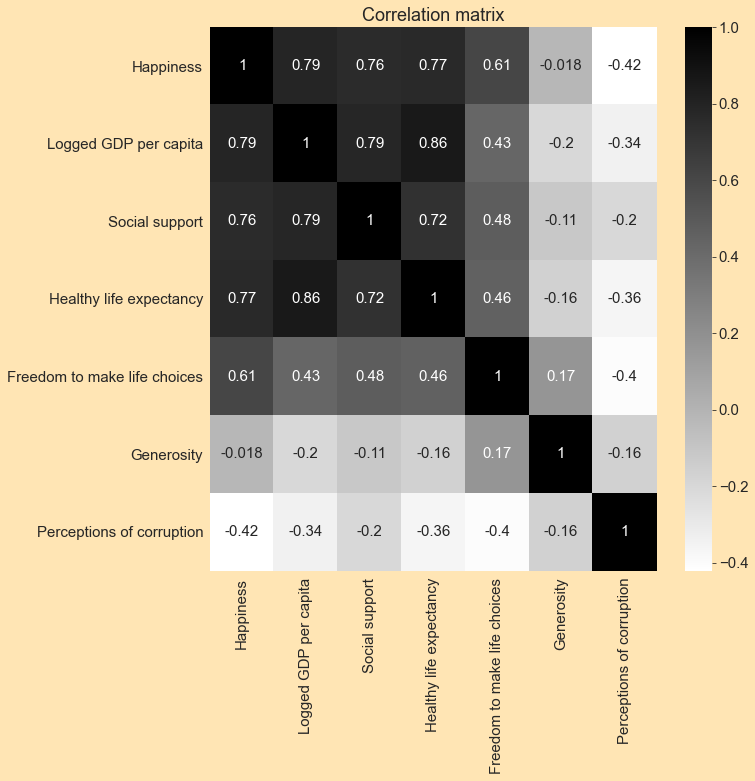

In [159]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap="gray_r",annot=True,)
plt.title("Correlation matrix")
plt.show()

 - We can see from the matrix that corruption leads to fall in happiness,while generosity also do not contribute much to happiness
 - GDP per capita, Social support,Healty life expectaions are the factors that contributes highly to happiness

# Corruption according to regions

In [160]:
df.columns

Index(['Country name', 'Regional indicator', 'Happiness',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

<AxesSubplot:title={'center':'Avg Corruption according to region'}, xlabel='Perceptions of corruption', ylabel='Regional indicator'>

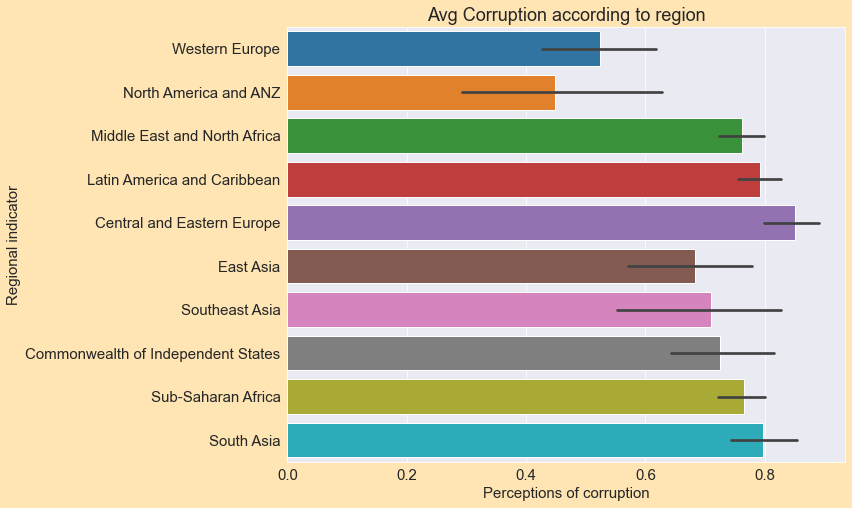

In [163]:
plt.title("Avg Corruption according to region")
sns.barplot(x="Perceptions of corruption",y="Regional indicator",data=df)

 - Central and Eastern Europe has the highest perceptions of corruptions
 - North America and ANZ has the least perceptions of corruptions

# Life expectancy of top 10 and bottom 10 happiest countries

In [165]:
top_10_happy_countries=df.head(10) # since the data is as per happiness in decsending order
top_10_happy_countries

,Country name,Regional indicator,Happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.3,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.7,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.6,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.4,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.3,0.908,0.042,0.481


In [166]:
bottom_10_happy_countries=df.tail(10) 
bottom_10_happy_countries

,Country name,Regional indicator,Happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
141,Tanzania,Sub-Saharan Africa,3.623,7.876,0.702,57.999,0.833,0.183,0.577
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


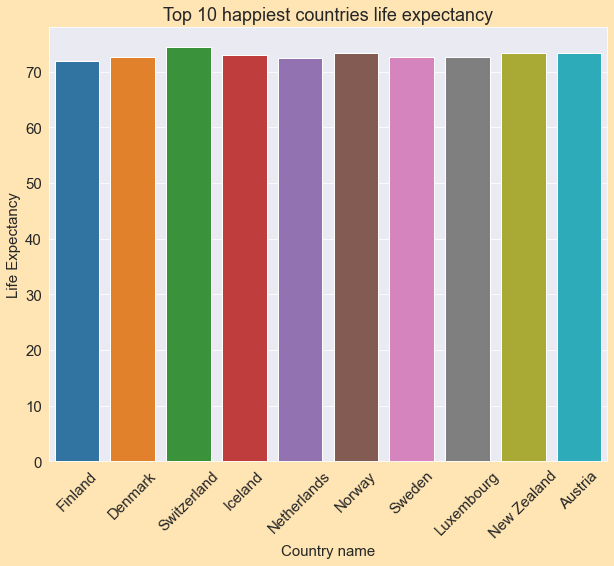

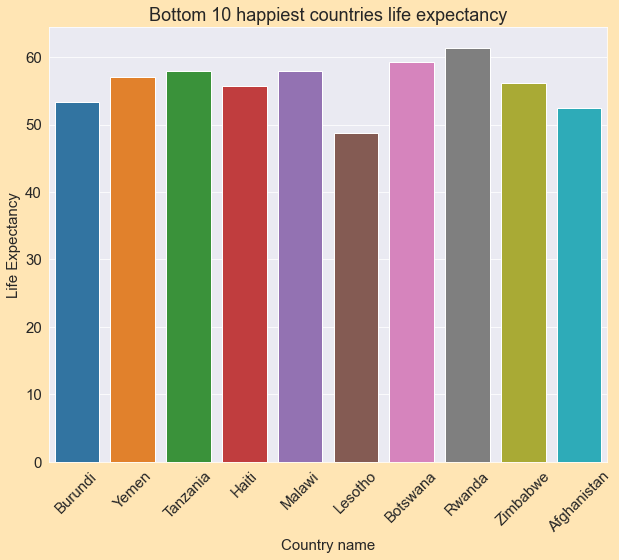

In [178]:
sns.barplot(x=top_10_happy_countries["Country name"],y=top_10_happy_countries["Healthy life expectancy"],data=top_10_happy_countries)
#plt.figure(figsize=(5,5))
plt.title("Top 10 happiest countries life expectancy")
plt.xlabel("Country name")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.show()

sns.barplot(x=bottom_10_happy_countries["Country name"],y=bottom_10_happy_countries["Healthy life expectancy"],data=bottom_10_happy_countries)
#plt.figure(figsize=(16,8))
plt.title("Bottom 10 happiest countries life expectancy")
plt.xlabel("Country name")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=45)
plt.show()

 - people living in happiest countries have higher life expectancy as compared to those living in unhappy countries
 - Bottom 10 countries life expectancy is almost 10 years less as compared to top 10 happiest nations

# Relation between freedom to make life choices and happiness

In [179]:
df.columns

Index(['Country name', 'Regional indicator', 'Happiness',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

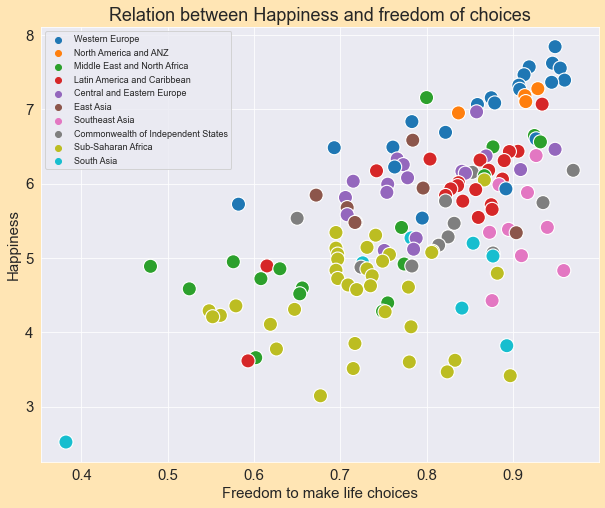

In [192]:
sns.scatterplot(x='Freedom to make life choices',y='Happiness',hue='Regional indicator',data=df,s=200)
plt.legend(loc="upper left",fontsize=9)
plt.title("Relation between Happiness and freedom of choices")
plt.show()

- From the above scatterplot, we can see that again 
    - The relation is much linear between freedom to make choices and happiness
    - western europe has the highest happiness as they have freedom tp make their life choices.
    - so it means, not only GDP but freddom to mak choices also contribute significantly to happiness.
    - Middle East and North africa has less freedom to make choices and thus they turn out to be unhappy.
    - Sub-Saharan region has decent freedom to make choices but they are still unhappy probably because of low GDP per capita

# top 10 Most corrupt countries

In [227]:
df.columns

Index(['Country name', 'Regional indicator', 'Happiness',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [228]:
idx=df["Perceptions of corruption"].sort_values(ascending=False).head(10).index
idx


Int64Index([59, 45, 87, 63, 148, 109, 64, 32, 144, 33], dtype='int64')

In [229]:
a=df.iloc[idx]
a

,Country name,Regional indicator,Happiness,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
59,Croatia,Central and Eastern Europe,5.882,10.217,0.924,70.799,0.754,-0.118,0.939
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
109,Ukraine,Commonwealth of Independent States,4.875,9.436,0.888,64.902,0.724,-0.011,0.924
64,Moldova,Commonwealth of Independent States,5.766,9.454,0.857,65.699,0.822,-0.079,0.918
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911


# to plot the above data

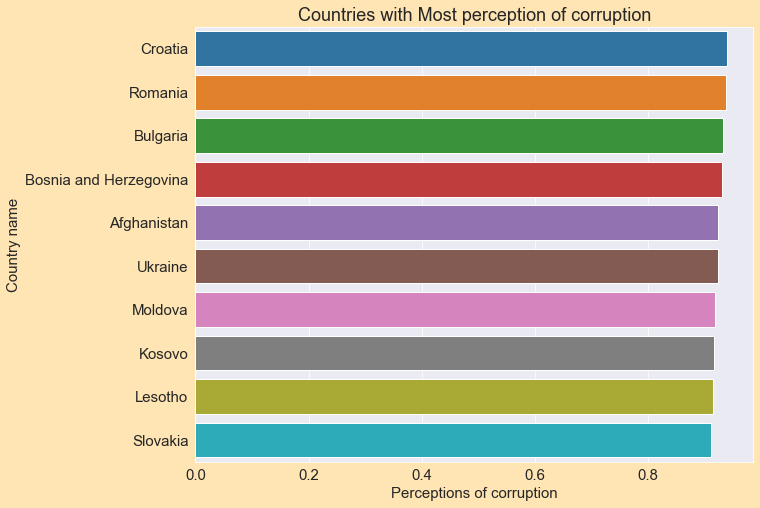

In [231]:
sns.barplot(y="Country name",x="Perceptions of corruption",data=a)
plt.title("Countries with Most perception of corruption")
plt.show()

 - Croatia has the highest perception of corruption followed by Romania and Bulgaria
 - All of the counrties in the above chart has perception of corruption of more than 0.85

# To plot relation between happiness and perception of corruption

In [232]:
df.columns

Index(['Country name', 'Regional indicator', 'Happiness',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

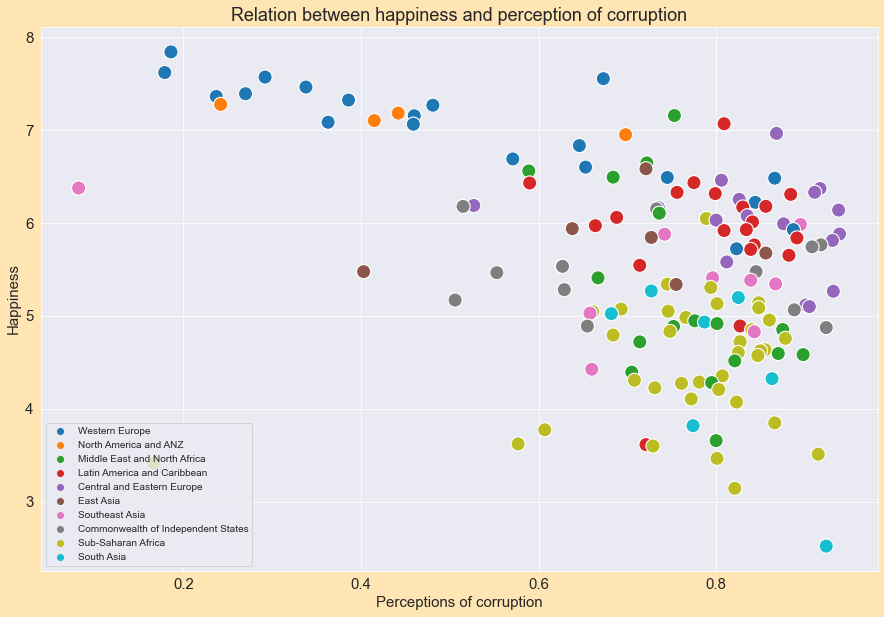

In [256]:
sns.scatterplot(x="Perceptions of corruption",y="Happiness",data=df,hue="Regional indicator",s=200)
plt.rcParams['figure.figsize']=(15,8)
plt.legend(loc="lower left",fontsize=10)
plt.title("Relation between happiness and perception of corruption")
plt.show()


- from the above chart it is clear that,
    - Western Europe has the least perception of corruption and hence they are happiest
    - Central and Eastern europe also has good amount of perception of corruption and thus are immediate in terms of happiness
    - Sub-Saharan Africa also has very high perception of corruption and thus are unhappy.